<a href="https://colab.research.google.com/github/ARJUN108-verma/Internship-at-Gudsky-Research-Foundation/blob/main/4_Feature_Engineering_Creating_New_Features_from_Existing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Feature Engineering: Creating New Features from Existing Data


In [1]:
#import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load Dataset
df = pd.read_csv("/content/loan.csv")
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [3]:
#Dataset Shape & Overview
print(df.shape)
df.info()

(500, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


In [4]:
#Statistical Summary
df.describe(include="all")

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
count,500,500,500.000000,500.000000,500,500,400,200.00000,500.000000,500,500
unique,500,3,NaN,NaN,7,25,320,NaN,NaN,4,2
top,xqd20160500,PAIDOFF,NaN,NaN,9/11/2016,10/10/2016,9/26/2016 9:00,NaN,NaN,college,male
freq,1,300,NaN,NaN,231,123,9,NaN,NaN,220,423
mean,NaN,NaN,943.200000,22.824000,NaN,NaN,NaN,36.01000,31.116000,NaN,NaN
std,NaN,NaN,115.240274,8.000064,NaN,NaN,NaN,29.38088,6.084784,NaN,NaN
min,NaN,NaN,300.000000,7.000000,NaN,NaN,NaN,1.00000,18.000000,NaN,NaN
25%,NaN,NaN,1000.000000,15.000000,NaN,NaN,NaN,3.00000,27.000000,NaN,NaN
50%,NaN,NaN,1000.000000,30.000000,NaN,NaN,NaN,37.00000,30.000000,NaN,NaN
75%,NaN,NaN,1000.000000,30.000000,NaN,NaN,NaN,60.00000,35.000000,NaN,NaN


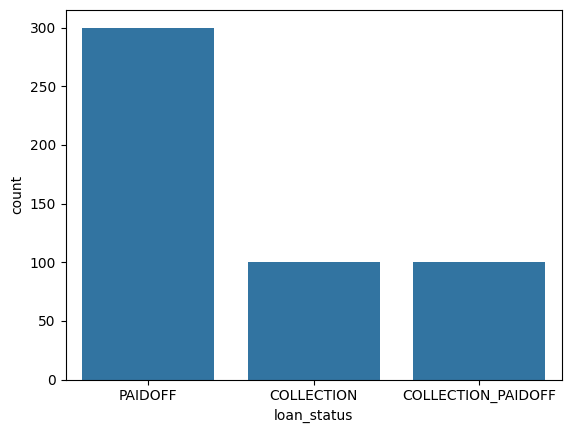

In [5]:
#Target Variable Distribution
sns.countplot(x="loan_status", data=df)
plt.show()

<Axes: >

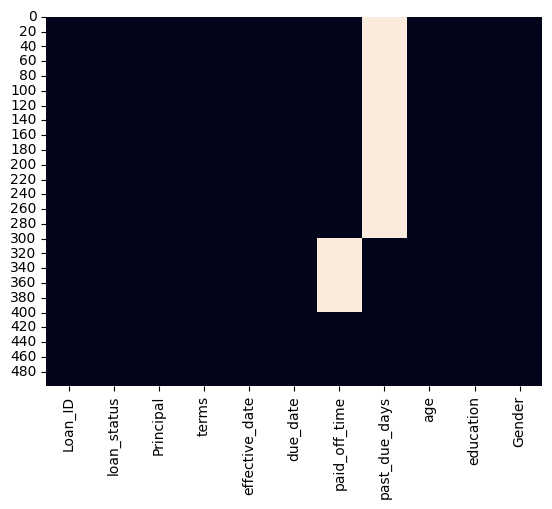

In [6]:
#Check Missing Values
df.isnull().sum()
sns.heatmap(df.isnull(), cbar=False)

In [14]:
# Handle LoanAmount if present
if 'LoanAmount' in df.columns:
    df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

# Handle Credit_History if present
if 'Credit_History' in df.columns:
    df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

# For all other categorical variables
df.fillna(df.mode().iloc[0], inplace=True)

In [21]:
#Encode Categorical Features
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

In [22]:
#Compare Before vs After
print("Original shape:", pd.read_csv("loan.csv").shape)
print("After Feature Engineering:", df.shape)

Original shape: (500, 11)
After Feature Engineering: (500, 11)


In [27]:
#Save Processed Dataset
df.to_csv("loan_processed.csv", index=False)